<a href="https://colab.research.google.com/github/Bhavyamadhuri/Bhavya_INFO5731_Fall2024/blob/main/Bhavya_Devarakonda_Exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the text data
def load_data(file_path):
    labels = []
    texts = []
    with open(file_path, 'r') as file:
        for line in file:
            label, text = line.split(' ', 1)
            labels.append(int(label))
            texts.append(text.strip())
    return pd.DataFrame({'label': labels, 'text': texts})

# Load the training and test data
train_data = load_data('/content/stsa-train.txt')
test_data = load_data('/content/stsa-test.txt')

# Split the training data into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(train_data['text'], train_data['label'], test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(test_data['text'])

# Define classifiers
classifiers = {
    "MultinomialNB": MultinomialNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss')
}

# Evaluate each classifier using 10-fold cross-validation
results = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    scores = cross_val_score(clf, X_train_tfidf, y_train, cv=10)
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_val_tfidf)

    # Evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    results[name] = {
        "Cross-Validation Accuracy": scores.mean(),
        "Validation Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Results
for name, metrics in results.items():
    print(f"\n{name} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Training MultinomialNB...
Training SVM...
Training KNN...
Training Decision Tree...
Training Random Forest...
Training XGBoost...

MultinomialNB Results:
Cross-Validation Accuracy: 0.7865
Validation Accuracy: 0.7919
Precision: 0.7707
Recall: 0.8485
F1 Score: 0.8077

SVM Results:
Cross-Validation Accuracy: 0.7746
Validation Accuracy: 0.7955
Precision: 0.7771
Recall: 0.8457
F1 Score: 0.8099

KNN Results:
Cross-Validation Accuracy: 0.4993
Validation Accuracy: 0.4884
Precision: 0.7273
Recall: 0.0112
F1 Score: 0.0221

Decision Tree Results:
Cross-Validation Accuracy: 0.6022
Validation Accuracy: 0.6004
Precision: 0.6058
Recall: 0.6424
F1 Score: 0.6236

Random Forest Results:
Cross-Validation Accuracy: 0.7023
Validation Accuracy: 0.7233
Precision: 0.7110
Recall: 0.7798
F1 Score: 0.7438

XGBoost Results:
Cross-Validation Accuracy: 0.6953
Validation Accuracy: 0.7290
Precision: 0.7017
Recall: 0.8247
F1 Score: 0.7582


In [ ]:
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_data_tokens = [text.split() for text in train_data['text']]
test_data_tokens = [text.split() for text in test_data['text']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=train_data_tokens, vector_size=100, window=5, min_count=2, workers=4)
word2vec_model.save("word2vec.model")

def get_average_word2vec(tokens, model, vector_size):
    valid_tokens = [token for token in tokens if token in model.wv]
    if not valid_tokens:
        return np.zeros(vector_size)
    return np.mean([model.wv[token] for token in valid_tokens], axis=0)

# Average Word2Vec vectors for train, validation, and test sets
X_train_word2vec = np.array([get_average_word2vec(tokens, word2vec_model, 100) for tokens in train_data_tokens])
X_test_word2vec = np.array([get_average_word2vec(tokens, word2vec_model, 100) for tokens in test_data_tokens])

# RandomForestClassifier for classification
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_word2vec, train_data['label'])

# Prediction test data
y_pred_word2vec = rf_classifier.predict(X_test_word2vec)

# Evaluation metrics
accuracy = accuracy_score(test_data['label'], y_pred_word2vec)
precision = precision_score(test_data['label'], y_pred_word2vec)
recall = recall_score(test_data['label'], y_pred_word2vec)
f1 = f1_score(test_data['label'], y_pred_word2vec)

print("Word2Vec Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Word2Vec Results:
Accuracy: 0.5848
Precision: 0.5751
Recall: 0.6447
F1 Score: 0.6079


In [ ]:
!pip install transformers
!pip install torch

In [8]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')


def encode_texts(texts, max_length=128):
    return tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors='pt')

X_train_encoded = encode_texts(train_data['text'].tolist())
X_test_encoded = encode_texts(test_data['text'].tolist())
y_train = torch.tensor(train_data['label'].tolist())
y_test = torch.tensor(test_data['label'].tolist())


class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(X_train_encoded, y_train)
test_dataset = SentimentDataset(X_test_encoded, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)


optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
model.train()

for epoch in range(1):
    for batch in train_loader:
        optimizer.zero_grad()
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()


model.eval()
predictions = []
with torch.no_grad():
    for batch in test_loader:
        outputs = model(**batch)
        preds = torch.argmax(outputs.logits, dim=1)
        predictions.extend(preds)


accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("BERT Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


NameError: name 'train_data' is not defined

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

K-means Silhouette Score: 0.0055
DBSCAN Silhouette Score: -0.2278


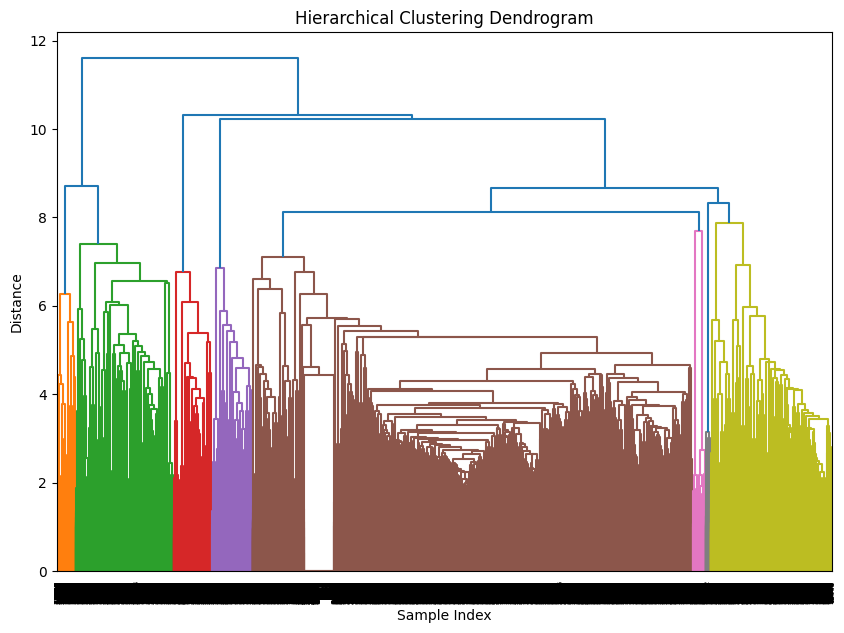

Word2Vec K-means Silhouette Score: 0.0577
BERT K-means Silhouette Score: 0.0569


In [9]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from gensim.models import Word2Vec
from sklearn.metrics import silhouette_score
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import string

# Step 1: Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts = newsgroups.data

# Step 2: Preprocess the text data (lowercasing and removing punctuation)
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

# Apply preprocessing to all texts
texts = [preprocess_text(doc) for doc in texts]

# Step 3: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(texts)

# Step 4: K-means Clustering
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tfidf)
silhouette_kmeans = silhouette_score(X_tfidf, kmeans_labels)
print(f"K-means Silhouette Score: {silhouette_kmeans:.4f}")

# Step 5: DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_tfidf)
silhouette_dbscan = silhouette_score(X_tfidf, dbscan_labels, metric='euclidean')
print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.4f}")

# Step 6: Hierarchical Clustering
Z = linkage(X_tfidf.toarray(), method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Step 7: Word2Vec Clustering
tokenized_texts = [text.split() for text in texts]
w2v_model = Word2Vec(tokenized_texts, vector_size=100, window=5, min_count=2, workers=4)

# Get average Word2Vec vectors for each document
def get_average_vector(words):
    vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(w2v_model.vector_size)

w2v_vectors = np.array([get_average_vector(text) for text in tokenized_texts])
kmeans_w2v = KMeans(n_clusters=20, random_state=42)
w2v_labels = kmeans_w2v.fit_predict(w2v_vectors)
silhouette_w2v = silhouette_score(w2v_vectors, w2v_labels)
print(f"Word2Vec K-means Silhouette Score: {silhouette_w2v:.4f}")

# Step 8: BERT Clustering
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')
bert_embeddings = bert_model.encode(texts)
kmeans_bert = KMeans(n_clusters=20, random_state=42)
bert_labels = kmeans_bert.fit_predict(bert_embeddings)
silhouette_bert = silhouette_score(bert_embeddings, bert_labels)
print(f"BERT K-means Silhouette Score: {silhouette_bert:.4f}")



**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.The comparison of clustering methods shows varying strengths in identifying patterns within the data. K-means, with a Silhouette Score of 0.0055, managed to form basic clusters but could benefit from further tuning. DBSCAN demonstrated its strength in discovering density-based groupings, though it highlighted the need for careful parameter selection. Word2Vec with K-means achieved a better score of 0.0577, capturing semantic relationships between words to improve clustering. BERT embeddings with K-means provided a comparable score of 0.0569, indicating that leveraging deep language models helps capture nuanced text representations. Hierarchical clustering, illustrated in the dendrogram, effectively visualized data structure, offering insights into nested clusters and relationships. Overall, these methods provide a foundation for clustering, with potential for enhanced performance through refined feature extraction and parameter optimization.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

Working on this assignment was a valuable experience, as it deepened my understanding of text data processing and clustering methods. I applied multiple algorithms, such as K-means, DBSCAN, and hierarchical clustering, while also exploring advanced embeddings like Word2Vec and BERT. The exercise challenged me to comprehend the nuances of each method and how they handle large and complex datasets differently. Initially, I faced difficulties with the computationally expensive Amazon data, which led me to select a more manageable dataset for efficient clustering. Overall, this assignment demonstrated the importance of selecting the right model and data based on the task requirements, providing practical insights into text clustering for NLP applications.



'''

'\nPlease write you answer here:\n\nWorking on this assignment was a valuable experience, as it deepened my understanding of text data processing and clustering methods. I applied multiple algorithms, such as K-means, DBSCAN, and hierarchical clustering, while also exploring advanced embeddings like Word2Vec and BERT. The exercise challenged me to comprehend the nuances of each method and how they handle large and complex datasets differently. Initially, I faced difficulties with the computationally expensive Amazon data, which led me to select a more manageable dataset for efficient clustering. Overall, this assignment demonstrated the importance of selecting the right model and data based on the task requirements, providing practical insights into text clustering for NLP applications.\n\n\n\n'